# Customer Personality Analysis
<img src='./images/banner.png'/>

# Table of Content

- [Introduction](#1)
    - [About this Notebook](#1.1)
    - [About this Dataset](#1.2)
- [Preparation](#2)

<a id='1'></a>
# 1 Introduction
<a id='1.1'></a>
## 1.1 About This Notebook
In this Notebook, I will do the EDA base on <a href=https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/>this article</a>, using Data from <a href=https://www.kaggle.com/imakash3011/customer-personality-analysis>Customer Personality Analysis Dataset</a> on Kaggle
<a id='1.2'></a>
## 1.2 About this Dataset
*For more information, <a href=https://www.kaggle.com/imakash3011/customer-personality-analysis>click here</a>*

**Context**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**

People
- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if customer complained in the last 2 years, 0 otherwise

Products
- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years

Promotion
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
- `NumWebPurchases`: Number of purchases made through the company’s web site
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s web site in the last month

<a id='2'></a>
# 2 Preparation
- Import Packages
- Pandas Display settings
- Load the Data

In [1]:
# Import Packages
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas Display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('./datasets/marketing-campaign.xlsx')

<a id='3'></a>
# 3 Exploratory Data Analysis - EDA

## 3.1 Take a Quick Look

In [3]:
print('Number of Attributes: {}'.format(df.shape[1]))
print('Number of Entries   : {}'.format(df.shape[0]))

Number of Attributes: 29
Number of Entries   : 2240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**
- The Raw Data has `29` Attributes and `2240` Entries, which is quite big to me.
- `3/29` Attributes are Object, the remaining are number, with `1` is float and `3` are integer.
- Fortunately (but not really), the Data has only `1` attribute contains missing value, **`Income`** $\rightarrow$ Impute it with proper value later.

## 3.2 Discriptive Statistics
Now we have a better sense of our data, we should looke a little deeper using Discriptive Statistics.

In [5]:
# For Numeric Attributes
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# For Object (String) Attributes
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


**Observations:**
- Some distributions of the Data may in a good shape, since their `mean` and `median` are fairly close (for instance, Year_Birth has `mean` `1968.8` and `median` `1970`, just around `1` off).
- But nothing is sure here, we better visualize our data for a better sense of comprehension.

<a id='4'></a>
# 4 Visualization
## 4.1 Univariate Analysis
We will start with looking at the distribution of each Attribute, since the Data has a quite number of attributes, we have to be carefull here.

### 4.1.1 Non-numerical Distribution
We will use **bar plot** for the distribution of non-numerical attributes

But there is something we have to do first:
- Attribute `Dt_Customer` is a Time Series Attribute, which is pretty hard to plot (just because I don't know how to plot this kind of Data).
- My solution is binning them into bins, separated by `Year`, and store them as a new attribute `Dt_Customer_Year`.

In [7]:
# Extract Year from Dt_Customer
df['Dt_Customer_Year'] = [df['Dt_Customer'][i][-4:] for i in range(df.shape[0])]

In [8]:
df['Dt_Customer_Year'].value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer_Year, dtype: int64

<AxesSubplot:>

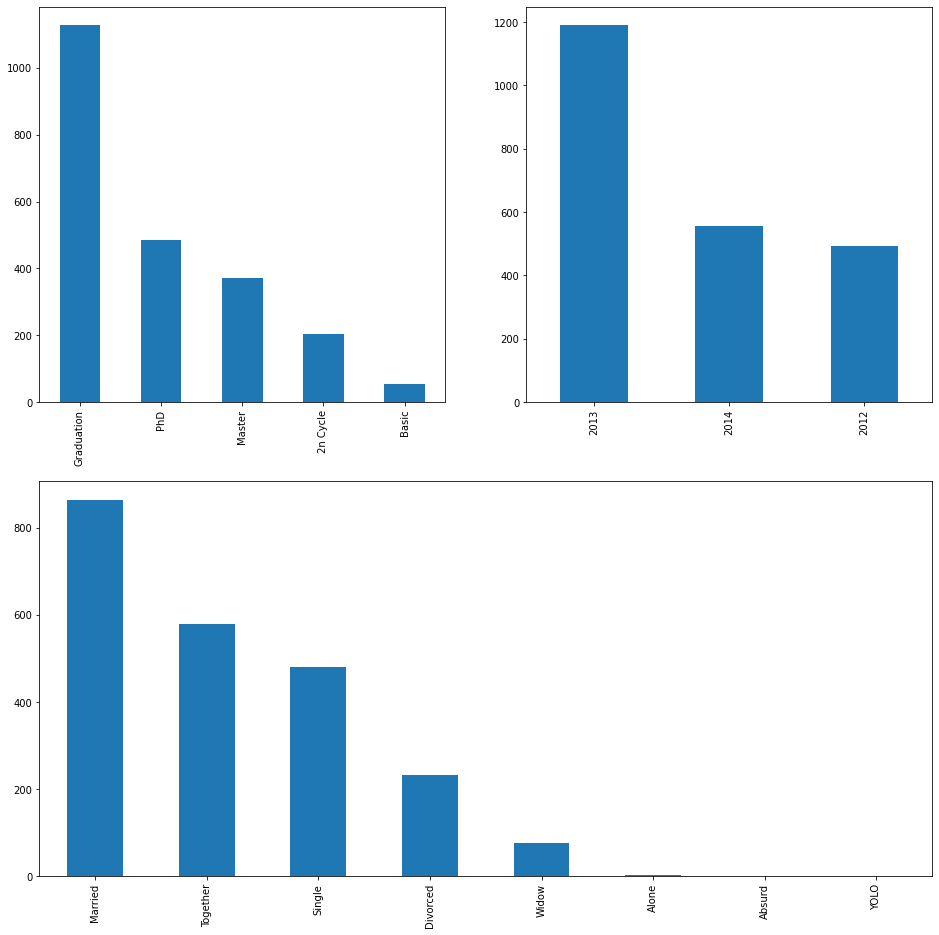

In [9]:
fig = plt.figure(figsize=(16, 16))
gridspec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gridspec[0, 0])
df['Education'].value_counts().plot(kind='bar', ax=ax0)
ax1 = fig.add_subplot(gridspec[0, 1])
df['Dt_Customer_Year'].value_counts().plot(kind='bar', ax=ax1)
ax2 = fig.add_subplot(gridspec[1, :])
df['Marital_Status'].value_counts().plot(kind='bar', ax=ax2)

**Observations:**
- Large majority of Our Customer's Education is `Graduation` (about `50.3%` of all Customer). Second place is `PhD` with `486` entries, accounting for `21.7%` and `Master` reserves the Third place with `370` entries, `16.5%` of total.
- Half of the Customer (`53%`) enrolled with our Company in 2013 then the number decreased dramatically by half the next year, 2014 (Why was it?). It's still decreased from `557` Customers in 2014 to `494` Customers in 2015, not so bad, but it should be in consideration.
- About their `Marital Status`, 
  - `864` of them, which account for `38.5%`, are `Married`
  - `580` of them, which account for `25.9%`, are `Together` (I don't know what is 'Together' here).
  - And `21.4%` are `Single`.
  - I can't find anything special here about our Customers' `Marital Status`, we may not need to consider much about this.

### 4.1.2 Numerical Distribution
We will use `Box plot` for this kind of Distribution, in which we can receive a better understanding about their distribution, their ranges, or any outlier remains.

In [10]:
# Make a list contains all numerical columns' name
num_cols = df.columns[df.dtypes!=object]

# No one ever anylyze ID attribute...
num_cols = num_cols.drop('ID')

# Take a look at our numerical attributes dimension
df[num_cols].shape

(2240, 25)

**Observations:**
- We have `25` numerical attributes (which is a lot to me), so we will use a figure with `25` subplot, using `5x5` grid.

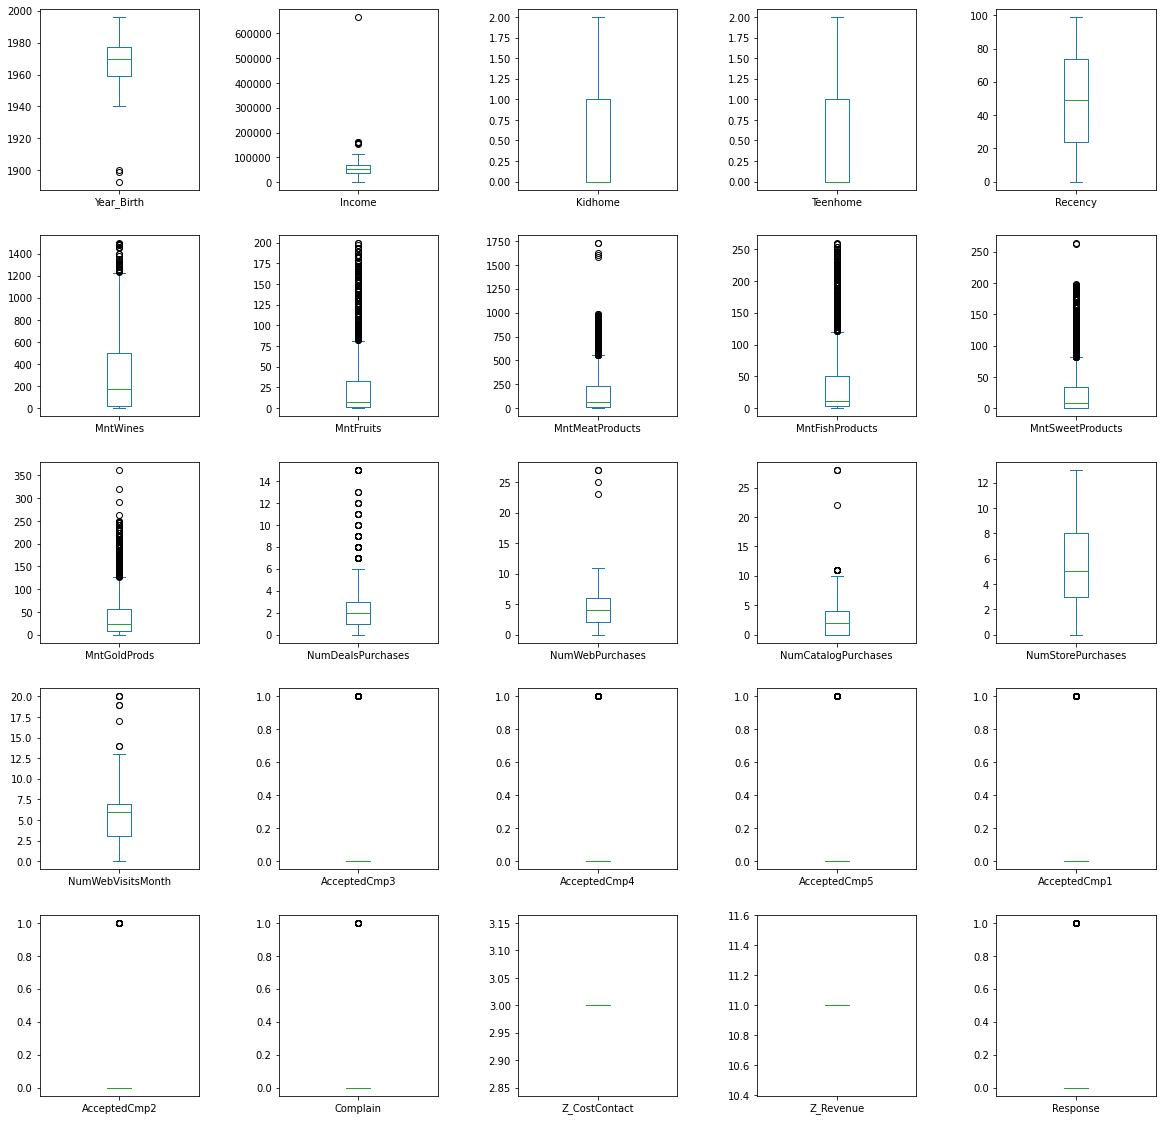

In [11]:
# Create new figure (Plot)
fig = plt.figure(figsize=(20, 20))
gridspec = fig.add_gridspec(5, 5)
gridspec.update(wspace=.5, hspace=.25)

# Plot each attribute to each subplot
plot_no = 0
for row in range(5):
    for col in range(5):
        locals()['ax'+str(plot_no)] = fig.add_subplot(gridspec[row, col])
        df[num_cols[plot_no]].plot(kind='box', ax=locals()['ax'+str(plot_no)])
        
        plot_no += 1
        
plt.savefig('plots/numerical_distribution.png', bbox_inches='tight')

**Observations:**
- We can find some insight using this plot, but it's not compact and precise.
- Some attributes are distributed discretely, which using `box plot` is meaningless, we have to use different kind of plotting for these, and `bar chart` is good here.
- So we have to separate these columns, but sadly, manually - I didn't found any good solution for this.
    - `num_cols_boxplot` contains: `Year_Birth`, `Income`, `Recency` and columns with name `Mnt...` or `Num...`.
    - `num_cols_barplot` contains: `Kidhome`, `Teenhome`, `Complain`, `Response` and columns with name `Accepted...`.
    - Columns with only 1 value (drop them): `Z_Revenue` and `Z_CostContact`.

In [12]:
# Numerical Attributes Plot using Box plot
num_cols_boxplot = ['Year_Birth', 'Income', 'Recency'] + list(df[num_cols].filter(regex='Mnt|Num'))

# Numerical Attributes Plot using Bar chart
num_cols_barplot = ['Kidhome', 'Teenhome', 'Complain', 'Response'] + list(df[num_cols].filter(regex='Accepted'))

In [13]:
print('Number of Attributes using Box Plot:', df[num_cols_boxplot].shape[1])
print('Number of Attributes using Bar Chart:', df[num_cols_barplot].shape[1])

Number of Attributes using Box Plot: 14
Number of Attributes using Bar Chart: 9


**Observations:**
- To plot these attributes, we will use 2 Figures:
  - A Figure with `4x4` grid for `14` Attributes using Box plot - we will have `2` blank subplot for this.
  - A Figure with `3x3` grid for `9` Attributes using Bar Chart - beautiful and clean.

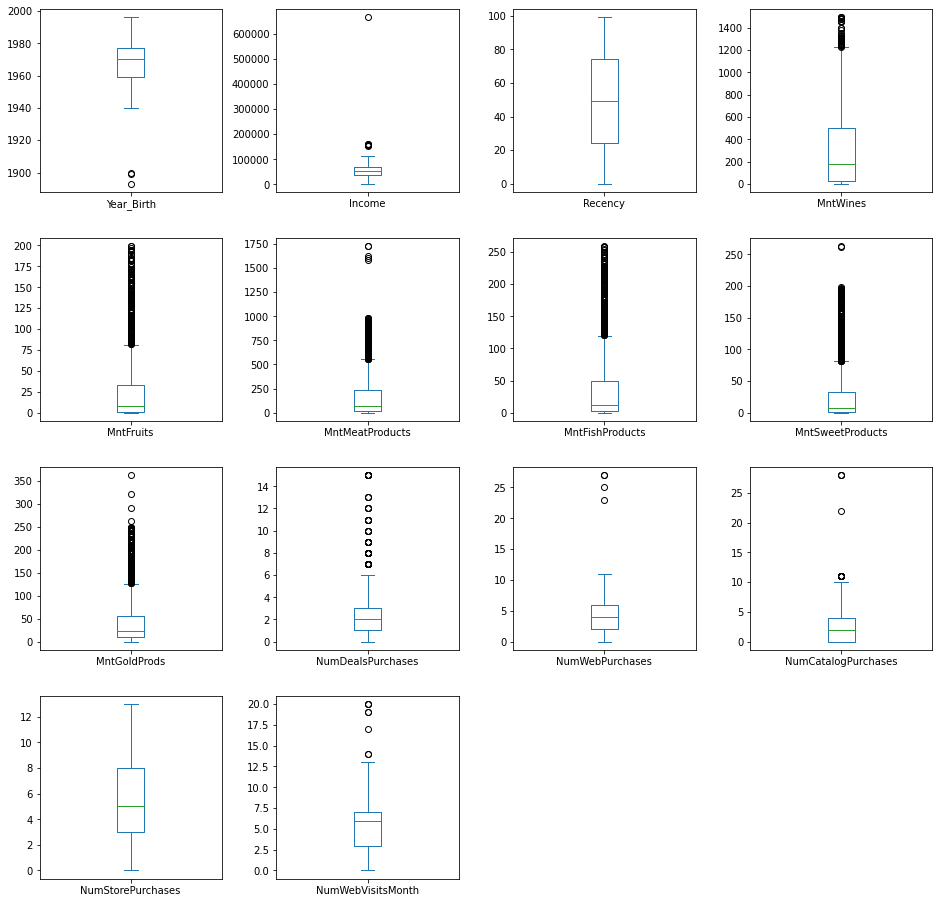

In [14]:
fig = plt.figure(figsize=(16, 16))
gridspec = fig.add_gridspec(4, 4)
gridspec.update(hspace=0.25, wspace=0.3)

plot_no = 0
for row in range(4):
    for col in range(4):
        locals()['ax'+str(plot_no)] = fig.add_subplot(gridspec[row, col])
        df[num_cols_boxplot[plot_no]].plot(kind='box', ax=locals()['ax'+str(plot_no)])
        
        # Plot till we plot enough 14 subplots
        if plot_no < 13:
            plot_no += 1
        else: break
            
plt.savefig('plots/numerical_box_distribution.png', bbox_inches='tight')

**Observations:**
- `Recency` and `NumStorePurchases` distributed beautifully and evenly without any outlier.
- `Year_Birth`, `Income`, `NumWebPurchases`, `NumCatalogPurchases` and `NumWebVisitsMonth` has some outlier, and some are really extreme.
- Other attributes has a lot outlier, which we have to analyze deeper later.

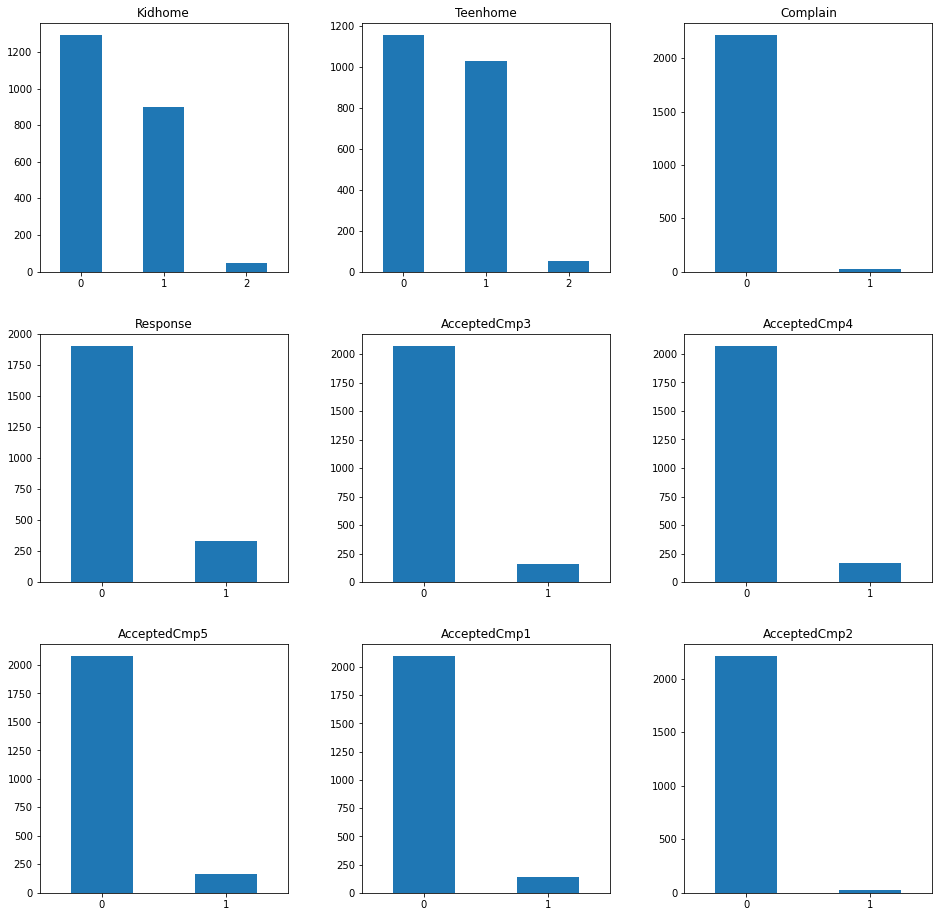

In [15]:
fig = plt.figure(figsize=(16, 16))
gridspec = fig.add_gridspec(3, 3)
gridspec.update(hspace=0.25, wspace=0.3)

plot_no = 0
for row in range(3):
    for col in range(3):
        locals()['ax'+str(plot_no)] = fig.add_subplot(gridspec[row, col])
        df[num_cols_barplot[plot_no]].value_counts().plot(kind='bar', rot=0, ax=locals()['ax'+str(plot_no)])
        
        # Display subplot Title
        locals()['ax'+str(plot_no)].set_title(num_cols_barplot[plot_no])
        
        plot_no += 1
        
plt.savefig('plots/numerical_bar_distribution.png', bbox_inches='tight')

**Observations:**
- Most of our Customers have `0` or `1` kid (or teen) in there house, only a small number has more than `1` kid. in later analysis, I will make a new attribute `Kidhome_and_Teenhome` to analyze the number of children in general our Customers have.
- It's good to see that most of our Customers has no `Complain`, the `Complain` rate is just `0.9375%`.
- Other attributes are not worth being considered.

**Tasks:**
- In later Analysis, make a new attribute `Kidhome_and_Teenhome` to analyze the number of children in general our Customers have.

## 4.2 Deeper Univariate Analysis
- Our Data is fairly big, and has lots of outlier, it's worth spending more time on univariate analysis before moving on.
### 4.2.1 Non-numerical Distribution
- One thing to do here: Analyze number of children our Customer have, by sum up their `Kidhome` and `Teenhome`.

<AxesSubplot:ylabel='Frequency'>

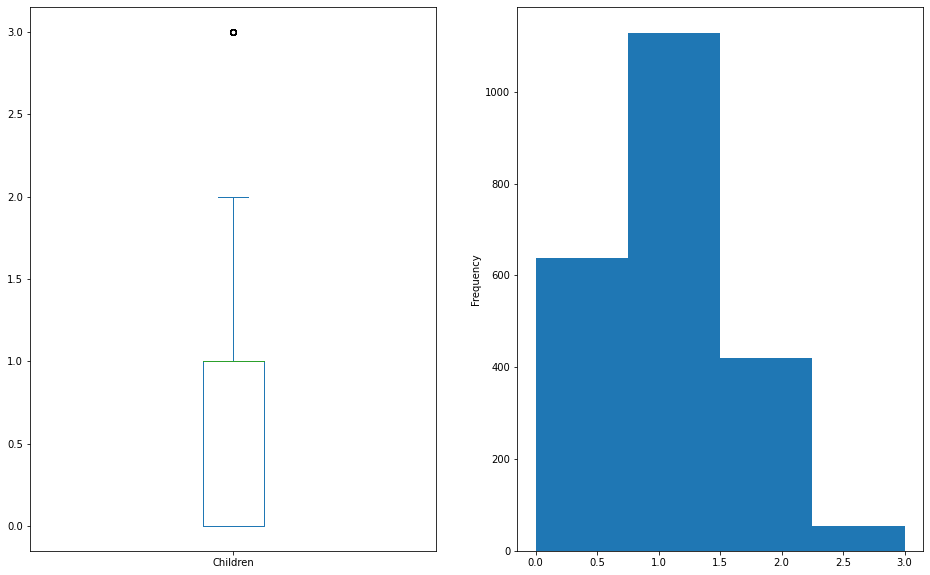

In [16]:
# Create new Attribute: Children, by sum up `Kidhome` and `Teenhome` attributes.
df['Children'] = df['Kidhome'] + df['Teenhome']

# Plot it using Boxplot and Histogram
fig = plt.figure(figsize=(16, 10))
box_ax = fig.add_subplot(1, 2, 1)
hist_ax = fig.add_subplot(1, 2, 2)

df['Children'].plot(kind='box', ax=box_ax)
df['Children'].plot(kind='hist', bins=4, ax=hist_ax)

In [22]:
for i in range(4):
    print('There is {}/{} Customers have {} Children in their Family, about {}%'.format(df[df['Children'] == i].shape[0], df.shape[0], i, round(df[df['Children'] == i].shape[0] / df.shape[0] * 100, 2)))

There is 638/2240 Customers have 0 Children in their Family, about 28.48%
There is 1128/2240 Customers have 1 Children in their Family, about 50.36%
There is 421/2240 Customers have 2 Children in their Family, about 18.79%
There is 53/2240 Customers have 3 Children in their Family, about 2.37%


**Observations:**
- More than a half of our Customers have only 1 Children and only `2.37%` of our Customers has 3 Children, which up till now tells us... nothing.
- But we may find this useful in the future.

### 4.2.2 Outliers
- Our Data distribution is... bad. Some Attributes has a large range but it is skewed pretty much a lot.
- Let's see some very unlikely and weird Outlier in our Attribute `Year_Birth`.

In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000


In [19]:
df[df['Year_Birth'] < 1920].sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Year,Children
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,2014,1
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,2013,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,2013,1


**Observations:**
- We have 3 very very old Customer: they are age more than a hundred years! With the oldest is now (to the time he become our Customer) `121`!!
- I see something cool here, let's calculate their z-Scores of numerical Attributes

<AxesSubplot:>

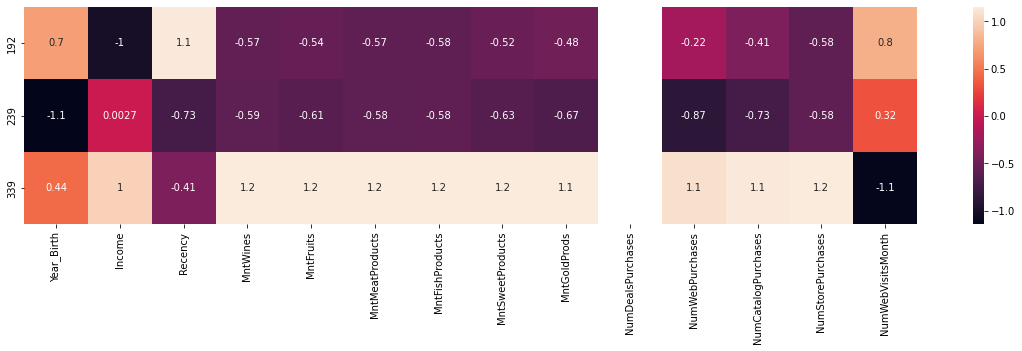

In [20]:
old_customer = df[df['Year_Birth'] < 1920][num_cols_boxplot]
plt.figure(figsize=(20, 4))
sns.heatmap((old_customer - old_customer.mean()) / old_customer.std(), annot=True)

**Observations:**
- Our Oldest Customer's Income is really close to the average, with just only `0.0027 std` away from the `mean`. He and the second Oldest bought not many stuffs of us, that's normal, I don't think they need a lot in their age now.
- But the interesting thing is the last Oldest Customer
    - He has the largest `Income` in group.
    - He the one who contributed an enomous sell for our Company (He rank around **top 96%** who bought the most stuffs!!)
    - He buys pretty much everything we sell, all of them are more than `1 std` from the `mean`.
    - But he not a fan of Online Shopping, eventhough he bought about `1900` products, he just visited our Online Website `once`.
- But analyze the Outlier is not really useful huh...?